# Importing Libraries

In [20]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# One Hot Encoder for encoding the test images

In [21]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Creating Lists →
1. data list for storing image data in numpy array form
2. paths list for storing the paths of all images
3. result list for storing one hot encoded form of target class whether no tumor or tumor

In [22]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [23]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [24]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [25]:
result = np.array(result)
result = result.reshape(139,2)

# Splitting the data into Training and Testing

In [26]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Building the Model

In [27]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (2, 2), input_shape = (128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size = (2, 2),  activation = 'relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = 'Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)       

In [28]:
y_train.shape

(111, 2)

In [29]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 7s 2s/step - loss: 32.2995 - val_loss: 41.4992
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 14.2800 - val_loss: 127.2882
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 10.3368 - val_loss: 76.8736
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 5.2212 - val_loss: 12.1950
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 4.1492 - val_loss: 15.1958
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 2.1349 - val_loss: 31.1893
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 1.8999 - val_loss: 15.0982
Epoch 8/30
3/3 [==============================] - 5s 2s/step - loss: 1.4666 - val_loss: 4.6232
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 0.6522 - val_loss: 6.4713
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.6507 - val_loss: 4.6632
Epoch 11/30
3/3 [=====================

# Plotting the Losses

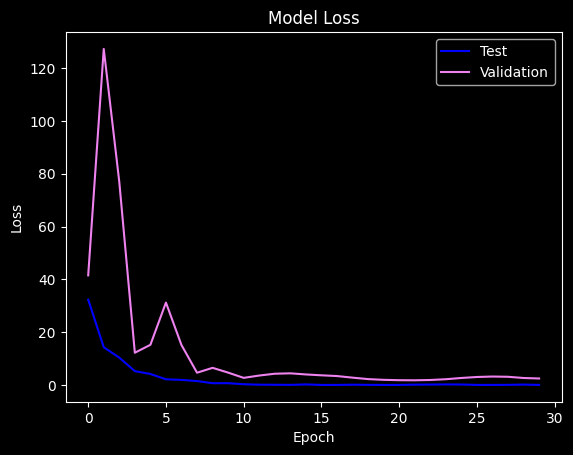

In [30]:
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'violet')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

# Basic if else conditions for no tumor or tumor

In [31]:
def names(number):
    if number == 0:
        return 'it is a Tumor'
    else:
        return 'it is not a Tumor'

# Now testing the model

100.0% confidence that it is not a Tumor


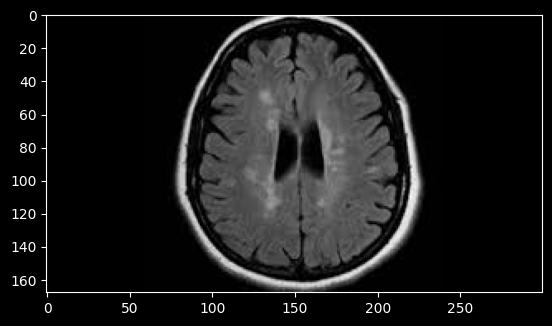

In [32]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/13 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% confidence that ' + names(classification))

100.0% confidence that it is a Tumor


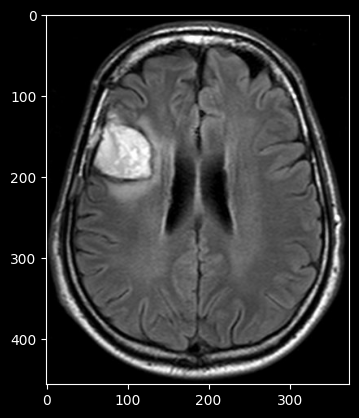

In [33]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y7.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% confidence that ' + names(classification))